# Aluno: Ernesto Gurgel Valente Neto
# Matricula: 1020157
# Turma I.A 2020
# Trabalho para nota da V2

# Exercicio de Clusterização


Vamos trabalhar com o dataset customers. O conjunto de dados original está [disponível na UCI](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). No nosso dataset foram removidos os atributos 'Channel' e 'Region' para facilitar a análise, pois o foco é verificarmos as seis categorias de produtos comprados pelos clientes, mas fique a vontade para trabalhar com o dado original. Após a remoção das duas variáveis citadas ficamos com o dataset final que será compostos de seis categorias importantes de produtos: Fresh, Milk, Grocery, Frozen, Detergents_Paper e Delicatessen (Perecíveis, Lacticínios, Secos e Molhados, Congelados, Limpeza/Higiene e Padaria/Frios)

#### Import as bibliotecas

In [1]:
# Importando bibliotecas
#import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame
from datetime import datetime

In [2]:
from sklearn.datasets import make_blobs

#### Acesse os dados disponíveis em customers.csv

In [3]:
df = pd.read_csv('C:/Users\Ernesto/Downloads/Trabalho_I.A_Dia_5/Wholesale_Customers_data.csv')

In [4]:
#criando os arquivos de data e os clusters
# Create Data
data = make_blobs(n_samples=200, n_features=6, 
                           centers=4, cluster_std=1.8,random_state=101)

In [5]:
#Conferindo os dados iniciais pela head para ver se estão corretos segundo o requesito do exercicio de clusterização
#compostos de seis categorias importantes de produtos: 
# Fresh, Milk, Grocery, Frozen, Detergents_Paper e Delicatessen 
#(Perecíveis, Lacticínios, Secos e Molhados, Congelados, Limpeza/Higiene e Padaria/Frios)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [7]:
#Utilizando a função describe para obter dados do data set e ter uma noção dos numeros, valores, medias ete 
#Exemplo media da idade é 29 anos
#Se os dados estao dispersos ou não e etc
print(df.describe())

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

In [8]:
#fazendo primeira verificação de valores nulos e dados e que tipo de dados são apresentados
pd.isnull(df)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [9]:
#usando comando para retirar outros quaisquer possiveis valores. Embora não existam, 'porem deixar comando salvo'
df.dropna(inplace=True)

In [10]:
#Verificando se existem valores nulos
#Resultado que não existem dados nulos
df.isnull().values.any()

False

In [11]:
#Uma correlação entre os valores em pares de colunas onde os valores eram excluidos valores NA ou seja valores nulos
#Atraves do comando pode-se encontrar a correlação em pares de todas as colunas no quadro de dados imprimido da tela
#Onde
#valores eram excluidos valores NA ou seja valores nulos são excluídos automaticamente. 
#Para qualquer coluna de tipo de dados não numérico no quadro de dados, ela é ignorada.
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [12]:
#removendo a coluna apenas comentada porque quando ja removida da erro
df.drop(['Channel'],axis=1,inplace=True)

In [13]:
#removendo a coluna apenas comentada porque quando ja removida da erro
df.drop(['Region'],axis=1,inplace=True)

In [14]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [15]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


In [16]:
df.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


## Visualizando os Dados

In [17]:
#plt.scatter(df[0][:,0],df[0][:,0],c=df[1],cmap='rainbow')
# sns.scatterplot(data = df, x =, y=, hue='')

In [18]:
#plt.scatter(df[;,0][:,1],c=kmeans_clusters.labels_,camp='rainbow')
#plt.scatter(kmeans_clusters.cluster_center_[:,0],kmeans_clusters.cluster_centers_[:,1],color='black')
#plt.show()

In [19]:
from IPython.display import display, Image

# Clusterização K-Means: Select Rows -> Maching Data -> Data, Scatter Plot
Inicio da Execução utilizando Orange para fazer uma avaliação inicial e montagem de dados

Image(url="https://cdn.discordapp.com/attachments/601509344533807107/717555213107724419/data_table.jpg")

![conv-only](https://cdn.discordapp.com/attachments/601509344533807107/717555213107724419/data_table.jpg)

# CSV FILE Import

Inicio da Execução utilizando Orange, carregando o arquivo CSV
Constando abaixo a lista de features que serão selecionadas a partir da terceira coluna (Fresh, Milk, Grocery, Frozen, Detergents_paper e Delicasssen)
Colunas Removidas: Channel e Region.


Image(url=https://cdn.discordapp.com/attachments/601509344533807107/717556432861528184/imagem_1.jpg)

![conv-only](https://cdn.discordapp.com/attachments/601509344533807107/717556432861528184/imagem_1.jpg)

# CSV Paint Data


Usando o Paint Data eu gerei um modelo de plano em 2D, se necessario eu poderia preencher o modelo com novo conjunto de dador ou marcalos separadamente se necessario ou quando de forma a gerar pontos claros e dados individuais ou usar um pincel para gerar ou demarcar conjunto de dados maiores, sendo essa também uma das etapas de pre-processamento do Orange em clusterização.



image(url=https://cdn.discordapp.com/attachments/601509344533807107/717558797534625842/imagem_2.jpg) 

![conv-only](https://cdn.discordapp.com/attachments/601509344533807107/717558797534625842/imagem_2.jpg)

# CSV Numero de Clusters e Sihouette Scores

Algoritimo da Silhouette 

Para calcular o coeficiente de Silhouette é preciso definir a distância média de um ponto para todos os outros pontos em seu cluster (a(i)) e também definir a distância média até os pontos do cluster mais próximo (b(i)). Então, o coeficiente de Silhouette é calculado assim: s(i) = (b(i) - a(i)) / max(b(i), a(i))

Para então poder visualizar e realizar uma análise feita com Silhouette, no caso realizando analise olhando para os clusters. Com base nessas informações então podemos calcular o scores médios do Silhouette pegando a média de todos os exemplos no dataset, por exemplo.



image(url=https://cdn.discordapp.com/attachments/601509344533807107/717560294809010236/imagem_3.jpg) 

![conv-only](https://cdn.discordapp.com/attachments/601509344533807107/717560294809010236/imagem_3.jpg)

# Sclatter Plot Distribuição

Fazendo uma Analise de como os dados estão distribuidos pelo numero de Clusters: Tamanho 2

Conseguinte analise comparativa após aumentar o número de clusters para tamanho 4

img(url = https://cdn.discordapp.com/attachments/601509344533807107/717567523117072464/imagem_4.jpg)

![conv-only](https://cdn.discordapp.com/attachments/601509344533807107/717567523117072464/imagem_4.jpg)

# Sclatter Plot Distribuição

Analise de Distribuição por clusters comparativa Tamanho 4

img(url=https://cdn.discordapp.com/attachments/601509344533807107/717568663213047828/imagem_5.jpg)

![conv-only](https://cdn.discordapp.com/attachments/601509344533807107/717568663213047828/imagem_5.jpg)

# Sclatter Plot Distribuição

Analise de Distribuição por clusters comparativa Tamanho 3; pela analise de como os dados estão distribuidos atraves dos modelos em relação a quantidade de clusters alocados em cada analise grafica eu acabaei optando por seguir em diante com 3 clusteres


img(url=https://cdn.discordapp.com/attachments/601509344533807107/717569718411722773/imagem_6.jpg)

# Sclatter Plot Distribuição: 

6 Features
3 Clusters
Geração de Linha de Regressão Linear

![conv-only](https://cdn.discordapp.com/attachments/601509344533807107/717569718411722773/imagem_6.jpg)

# Curva de Regressão 

Analise da curva e das Features (6), utilizando apenas (2 Clusters)
CSV Import, (Arquivo CSV)
Colunas, (6 Colunas/Features)
Data Table (Tabela completa)
Scatter Plot gerado para posteriormente analsiar conjuntos de dados

img(url=https://cdn.discordapp.com/attachments/601509344533807107/717633724208119819/imagem_7.jpg)

![conv-only](https://cdn.discordapp.com/attachments/601509344533807107/717633724208119819/imagem_7.jpg)

# Conjunto de Dados (ScaterPlot) : Score Plots

Analisando a computação de Score Distribuida com 3 possiveis clusteres e sua distribuição do conjunto de dados em relação a cada tipo de propriedade e quantidade de repetição de eventos para então analisar a diferença entre o algoritimo com 2 ou 3 Clusters para o problema.

Obs; Observando em analise como os dados estão dispostos acabarei optando pela utilização de apenas então 2 Clusters no algoritimo.

img(url=https://cdn.discordapp.com/attachments/601509344533807107/717636065028079616/ScorePlots_1.jpg)
img(url=https://cdn.discordapp.com/attachments/601509344533807107/717636425096626189/ScorePlots_2.jpg)
img(url=(https://cdn.discordapp.com/attachments/601509344533807107/717640354551169124/ScorePlots_34.jpg)
img(url=https://cdn.discordapp.com/attachments/601509344533807107/717640567240261692/ScorePlots_56.jpg)
img(url=https://cdn.discordapp.com/attachments/601509344533807107/717640678628261978/ScorePlots_78.jpg)

![conv-only](https://cdn.discordapp.com/attachments/601509344533807107/717636065028079616/ScorePlots_1.jpg)
![conv-only](https://cdn.discordapp.com/attachments/601509344533807107/717636425096626189/ScorePlots_2.jpg)
![conv-only](https://cdn.discordapp.com/attachments/601509344533807107/717640354551169124/ScorePlots_34.jpg)
![conv-only](https://cdn.discordapp.com/attachments/601509344533807107/717640567240261692/ScorePlots_56.jpg)
![conv-only](https://cdn.discordapp.com/attachments/601509344533807107/717640678628261978/ScorePlots_78.jpg)

# Estatisticas dos Conjuntos de Dados

Estatisticas da Disposição do Conjunto de Dados e da Disposição dos dados em relação ao numero de Clusters

###                              Colunas em ordem: Center, Dispersion, Min, Max, Missing
###  Linhas: Conjunto de Dados ordenado a seguir

![conv-only](https://cdn.discordapp.com/attachments/601509344533807107/717644992688029706/Estatisticas_Conjunto_De_dados.jpg)
![conv-only](https://cdn.discordapp.com/attachments/601509344533807107/717645120769490984/Distribuicao_dos_dados_dos_Clusters.jpg)

# Aplique pré-processamento sobre os dados para criar seu dataset alvo, se você julgar necessário. 
- Dica: Você pode considerar remover as amostras que são outiliers em mais de um atributo.

# Resolução Analise de pre-processamento:

#### - 1 Analises: Analisado graficamente os conjuntos de dados do dataset e sua distribuição em relação aos conjuntos de clusters.

#### - 2 Analise: Enfatizado a resolução para adoção de 2 clusters.
#### - 3 Removido duas colunas (como sugerido na questão).
#### - 4 Verificado a ausencia de valores nulos.
#### - 4 Verificado a ausencia de valores nulos.


# Analise de Outliers

In [20]:
#Em uma analise exploratoria fazendo a contagem total de linhas do Data Frame 
# e fazendo uma analise detalhada e exploratoria
print("# Quantidade de rows no dataframe {0}".format(len(df)))

# Quantidade de rows no dataframe 440


In [21]:
#Descrição, uso da função describe para observar os valores dos conjuntos de dados 
# em relação a uma analise de outliers gerada pelo sns.boxplot
print(df.describe())

               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper    Delicassen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000  


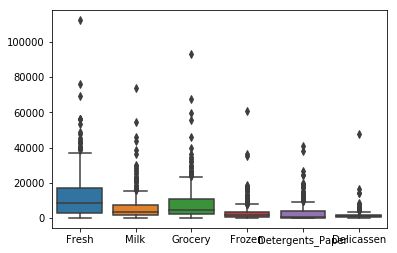

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df)

In [23]:
outliers=[]
def detect_outliers(data):
    threshold=3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
                outliers.append(y)
    return outliers     

In [24]:
remover outliers
#outliers_pt=detect_outliers(data)

SyntaxError: invalid syntax (<ipython-input-24-374ed001ffa9>, line 1)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


#importando o metodo da simulheta para gerar um plot para imaginar quantos clusters seriam usados
#Incliando melhor numero de casos como 5
from sklearn.metrics import silhouette_score

for k in range(2, 100):
    kmeans_ = KMeans(n_clusters=k, random_state=10)
    kmeans_.fit(data[0])
    print(k, silhouette_score(data[0], kmeans_.predict(data[0])))

In [ ]:
#Aplica o algoritmo de armazenamento em cluster k-Means aos dados e gera um novo conjunto de dados no qual o índice do cluster é usado como um atributo de classe. O atributo de classe original, se existir, é movido para meta atributos. As pontuações dos resultados do cluster para vários k também são mostradas no widget.

#K-means primeiro centra um valor aleatorio e depois vai escolhendo os pontos subsequentes por probabilidade e vai atraindo esses pontos.

In [ ]:
# Analisando os dados graficos e o numero de clusters pelo metodo da simulheta foi:
# pelos grupos e tipos de grupo e interpretação


## Criando os clusters

#### Aplique o algoritmo [K-means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), sobre o dataset criado. 
- Dicas: 
    * Julgue a necessidade de aplicar [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) ou não. Veja mais em nota, no final do exercício.
    * Aplique a [normalização](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), se for utilizar o PCA
    * Se for aplicar o PCA utilize o fit_transform() para facilitar sua vida
    * Para reverter os valores em alguma análise considere reverter os valores utilizando o método inverse_transform() do pipeline criado

#### Aplique o método da [silhueta](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) e verifique a qualidade do cluster gerado
 - Dicas: No método da silhueta você deve considerar kmeans_.predict(data) como sendo os **labels**

In [26]:
# Importando os arquivos
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Realizando uma variação para comperação de dados entre 2 e 3 Clusters
### Analise a seguir com 2 Clusters:

In [47]:
# Definindo a quantidade de clusters
# Depois de varias analises de processamento de dados o numero de clusters escolhidos será 2
# definição do objeto
kmeans = KMeans(n_clusters=2)

In [48]:
# chamada e passagem do conjunto de dados para a função kmeans
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [61]:
kmeanCentro2 = kmeans.cluster_centers_

In [62]:
#Armazenando o centro de 2 Clusters
kmeanCentro2

array([[ 7944.112     ,  5151.81866667,  7536.128     ,  2484.13066667,
         2872.55733333,  1214.26133333],
       [35401.36923077,  9514.23076923, 10346.36923077,  6463.09230769,
         2933.04615385,  3316.84615385]])

In [55]:
preds = kmeans.predict(df)
silhouette_score(df,preds)
# Indicação mostra um valor um pouco superior a metade

0.5115333898779053

In [57]:
#Armazenando o valor com 2 Cluster
cluster2 = 0.5115333898779053

In [29]:
for k in range(2, 15):
    kmeans_ = KMeans(n_clusters=k, random_state=10)
    kmeans_.fit(data[0])
    print(k, silhouette_score(data[0], kmeans_.predict(data[0])))

2 0.47107186488444036
3 0.6034034699784416
4 0.6147380886627678
5 0.49152372293505553
6 0.39063244178645734
7 0.2988420319185295
8 0.1638522391131196
9 0.15275653459129668
10 0.16984195441997368
11 0.17237063115479173
12 0.1432456535561771
13 0.1451466668183232
14 0.16266932748104584


In [36]:
for k in range(2, 25):
    kmeans_ = KMeans(n_clusters=k, random_state=10)
    kmeans_.fit(data[0])
    print(k, silhouette_score(data[0], kmeans_.predict(data[0])))

2 0.47107186488444036
3 0.6034034699784416
4 0.6147380886627678
5 0.49152372293505553
6 0.39063244178645734
7 0.2988420319185295
8 0.1638522391131196
9 0.15275653459129668
10 0.16984195441997368
11 0.17237063115479173
12 0.1432456535561771
13 0.1451466668183232
14 0.16266932748104584
15 0.1635705534055758
16 0.1671637780926324
17 0.14973598039380015
18 0.16578895794627763
19 0.15714089973919262
20 0.15977207780128572
21 0.14651480419866447
22 0.15344968404406453
23 0.1719141678501923
24 0.15828705813586885


## Realizando uma variação para comperação de dados entre 2 e 3 Clusters
### Analise a seguir com 3 Clusters:

In [39]:
# Definindo a quantidade de clusters
# Depois de varias analises de processamento de dados o numero de clusters escolhidos será 2
# definição do objeto
kmeans = KMeans(n_clusters=3)

In [40]:
# chamada e passagem do conjunto de dados para a função kmeans
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
for k in range(2, 15):
    kmeans_ = KMeans(n_clusters=k, random_state=10)
    kmeans_.fit(data[0])
    print(k, silhouette_score(data[0], kmeans_.predict(data[0])))

2 0.47107186488444036
3 0.6034034699784416
4 0.6147380886627678
5 0.49152372293505553
6 0.39063244178645734
7 0.2988420319185295
8 0.1638522391131196
9 0.15275653459129668
10 0.16984195441997368
11 0.17237063115479173
12 0.1432456535561771
13 0.1451466668183232
14 0.16266932748104584


In [63]:
#armazenando o valor do centro e printando
kmeanCentro3 = kmeans.cluster_centers_

In [65]:
#Printando o valor do Centro
kmeanCentro3

array([[ 7944.112     ,  5151.81866667,  7536.128     ,  2484.13066667,
         2872.55733333,  1214.26133333],
       [35401.36923077,  9514.23076923, 10346.36923077,  6463.09230769,
         2933.04615385,  3316.84615385]])

In [66]:
preds = kmeans.predict(df)
silhouette_score(df,preds)
# Indicação mostra um valor um pouco superior a metade

0.5115333898779053

In [71]:
#Armazenando o valor com 3 clusters
cluster3 = 0.4783511430782059

# Coeficiente de Silhueta

O coeficiente de silhueta é calculado usando a distância intra-cluster média (a) e a distância média do cluster mais próximo ( b) para cada amostra. 

O coeficiente de silhueta para uma amostra é . Para esclarecer, é a distância entre uma amostra e o cluster mais próximo do qual a amostra não faz parte. Observe que o Coeficiente da silhueta é definido apenas se o número de etiquetas for 2 <= n_labels <= n_samples - 1.(b - a) / max(a, b)b

O melhor valor é 1 e o pior valor é -1. Valores próximos a 0 indicam clusters sobrepostos. Valores negativos geralmente indicam que uma amostra foi atribuída ao cluster errado, pois um cluster diferente é mais semelhante.



## Comparando:

In [30]:
kmeans.cluster_centers_

array([[ 7944.112     ,  5151.81866667,  7536.128     ,  2484.13066667,
         2872.55733333,  1214.26133333],
       [35401.36923077,  9514.23076923, 10346.36923077,  6463.09230769,
         2933.04615385,  3316.84615385]])

In [69]:
#Armazenando o valor com 3 clusters
cluster2

0.5115333898779053

In [73]:
kmeanCentro2

array([[ 7944.112     ,  5151.81866667,  7536.128     ,  2484.13066667,
         2872.55733333,  1214.26133333],
       [35401.36923077,  9514.23076923, 10346.36923077,  6463.09230769,
         2933.04615385,  3316.84615385]])

In [74]:
#Armazenando o valor com 3 clusters
cluster3

0.4783511430782059

In [75]:
kmeanCentro3

array([[ 7944.112     ,  5151.81866667,  7536.128     ,  2484.13066667,
         2872.55733333,  1214.26133333],
       [35401.36923077,  9514.23076923, 10346.36923077,  6463.09230769,
         2933.04615385,  3316.84615385]])

 # -> Varie o número de K, hiper parâmetro do K-Means e identifique o melhor valor considerando o método da silhueta.

### Considerando analises anteriores previamente realizadas nos codigos acima na etapa de pre processamento de dados
### assim como as variações consideradas com 2 clusters/3clusters e 4 clusters

# 2 Clusters

![conv-only](https://cdn.discordapp.com/attachments/601509344533807107/717567523117072464/imagem_4.jpg)

# 3 Clusters

![conv-only](https://cdn.discordapp.com/attachments/601509344533807107/717569718411722773/imagem_6.jpg)

# 4 Clusters
![conv-only](https://cdn.discordapp.com/attachments/601509344533807107/717568663213047828/imagem_5.jpg)

 #### Desafio: 
   - Varie o número de K, hiper parâmetro do K-Means e identifique o melhor valor considerando o método da curva do cotovelo, [veja este exemplo](https://pythonprogramminglanguage.com/kmeans-elbow-method/). O resultado obtido foi igual ao aplicado na questão anterior?

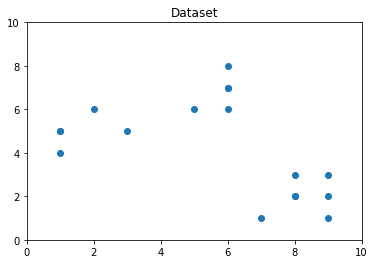

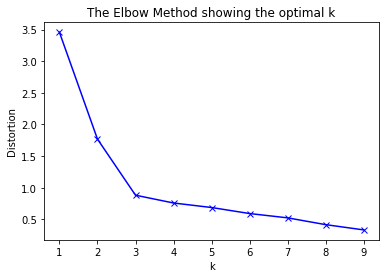

In [80]:
 # clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

 

#### Como você interpreta os resultados parecem favoráveis os centroídes são de fato distintos? Como você interpreta os dados com base nesta informação? 
- Dica.: Para recuperar os centroídes use kmeans.cluster_centers_

In [76]:
#Chamada da função para visualizar os valores dos centroides
kmeans.cluster_centers_

array([[ 7944.112     ,  5151.81866667,  7536.128     ,  2484.13066667,
         2872.55733333,  1214.26133333],
       [35401.36923077,  9514.23076923, 10346.36923077,  6463.09230769,
         2933.04615385,  3316.84615385]])

#### Desafio: 
   - Recupere os centroídes e faça um radar chart considerando os centroídes, [veja este exemplo](https://python-graph-gallery.com/391-radar-chart-with-several-individuals/).
       - Dica.: Para recuperar os centroídes use kmeans.cluster_centers_

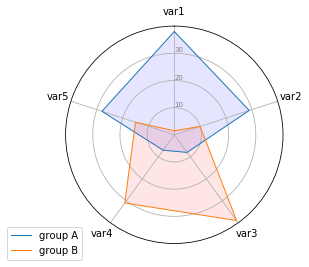

In [82]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
 
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

#### Recupere as amostras de cada cluster e faça um parallel coordinates, [veja este exemplo](https://python-graph-gallery.com/150-parallel-plot-with-pandas/) ou [este](https://jovianlin.io/data-visualization-seaborn-part-2/). Os resultados parecem favoráveis e os centroídes são de fato distintos? Como você interpreta os dados com base nesta informação?

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

df = pd.read_csv('C:/Users\Ernesto/Downloads/Trabalho_I.A_Dia_5/Wholesale_Customers_data.csv')

In [104]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [ ]:
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id",
                              dimensions=['Fresh', 'Milk', 'Grocery',
                                          'Frozen', 'Detergents_Paper','Delicatessen'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

#### Crie alguns gráficos, scatterplot do cluster, mostrando os dados definidos pelo cluster.
- Que tal tentar marcar os centroídes neste gráfico? *P.S.: Se você criou o PCA construa o gráfico considerando variações das componentes*

# Nota

- É muito comum aplicar PCA para reduzir a dimensionalidade dos dados, principalmente quando trabalhamos com aprendizagem não supervisionada. Para isso é necessário interpretar o quanto as componentes explicam a variação nos dados, por exemplo, qual o número de componentes utilizar e o cumulativo total que representa as componentes sobre os dados. Também é preciso explicar como as componenentes se relaciona as variáveis originais do dado, considerando todas as amostras ou parte delas. Nesses dois sites há dicas de como compreender melhor essa interpretação [dica_1](https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/principal-components/interpret-the-results/key-results/) e [dica_2](https://newonlinecourses.science.psu.edu/stat505/node/54/)

- **Desafio:** Se você utilizou o PCA realize a análise das componentes como valores acumulados e correlação

In [ ]:
#K-means primeiro centra um valor aleatorio e depois vai escolhendo os pontos subsequentes por probabilidade e vai atraindo esses pontos.